# Problem Set 3
## Daryl Larsen

## 1. Noncentral Chi-square distribution 
### (a). Simulate $\pi(\lambda,k)$ for $k=1,5,10$ degrees of freedom

In [1]:
using Distributions

α=0.05
R = 10^5

K = [1; 5; 10]
λ = 0.0:0.1:6.0

function pi(λ,K,R=10^5,α=0.05)
    nλ = length(λ)
    nK = length(K)
    # store results in π matrix
    pi = zeros(nλ,nK)
    
    # imma create the biggest Z matrix we'll need and then just take part of it
    m = maximum(K)
    Z = randn(R,m)
    
    for l = 1:nλ
        for k = 1:nK
            crit = quantile.(Chisq.(K[k]),(1-α))
            if k==1
                X = (Z[:,1] .+ λ[l]).^2 .> crit
            else
                X = (Z[:,1] .+ λ[l]).^2 .+ sum((Z[:,2:K[k]]).^2; dims=2) .> crit
            end
            prob = sum(X; dims=1) / R
            pi[l,k] = prob[1]
        end
    end
    return pi
end

#pi(λ,K)

pi (generic function with 3 methods)

### (b). Simulated rejection probabilities when $\lambda = 0$

In [2]:
pi(λ,K)[1,:]

3-element Vector{Float64}:
 0.05
 0.049
 0.04959

The rejection probabilities are all close to 0.05, exactly as we would expect since there is no noncentrality.

### (c). Plot the three power functions

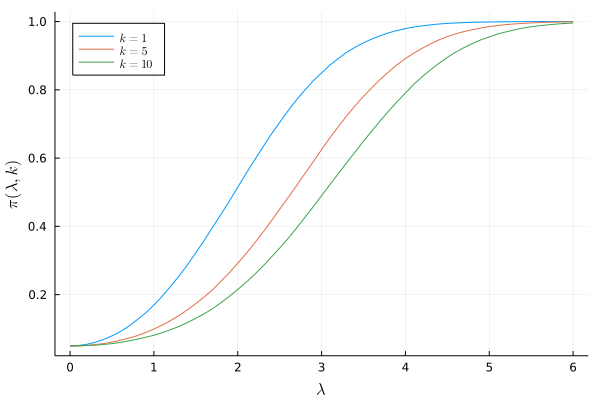

In [3]:
using Plots
using LaTeXStrings

plot(λ,pi(λ,K)[:,1],label=L"k=1")
plot!(λ,pi(λ,K)[:,2],label=L"k=5")
plot!(λ,pi(λ,K)[:,3],label=L"k=10",legend=:topleft)
plot!(xlabel=L"\lambda",ylabel=L"\pi(\lambda,k)")

### (d). Compare asymptotic power with different degrees of freedom

There's more asymptotic power with fewer degrees of freedom.